Breast Cancer Classification with NN

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data Collection and Processing


In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
# loading data to dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [6]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# adding target column to dataframe
data_frame["label"] = breast_cancer_dataset.target

In [8]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
data_frame.shape

(569, 31)

In [10]:
# getting information of dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# checking null values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [12]:
# statistical measures of dataset
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
# distribution of data
data_frame["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

In [14]:
# mean values
data_frame.groupby("label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [15]:
# separating features and target
X = data_frame.drop(columns = "label", axis = 1)
Y = data_frame["label"]

In [16]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

Data Standardization


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
standardized_data = scaler.fit_transform(X)

In [20]:
print(standardized_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [21]:
# updating features with standardized data
X = standardized_data
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [22]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Split Train and Test data


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [24]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (569, 30)
Train data:  (455, 30)
Test data:  (114, 30)


Building Neural Network

Importing Tensorflow and Keras

In [25]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [26]:
# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = "sigmoid")
])

In [27]:
# compiling the Neural Network

model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [28]:
# training the Neural Network

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 3s 88ms/step - loss: 0.5371 - accuracy: 0.6968 - val_loss: 0.4409 - val_accuracy: 0.7826
Epoch 2/10
13/13 [==============================] - 0s 12ms/step - loss: 0.3858 - accuracy: 0.8264 - val_loss: 0.3277 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 13ms/step - loss: 0.2940 - accuracy: 0.8900 - val_loss: 0.2582 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 13ms/step - loss: 0.2396 - accuracy: 0.9095 - val_loss: 0.2126 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 22ms/step - loss: 0.2019 - accuracy: 0.9242 - val_loss: 0.1819 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: 0.1748 - accuracy: 0.9389 - val_loss: 0.1595 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 15ms/step - loss: 0.1541 - accuracy: 0.9487 - val_loss: 0.1421 - val_accuracy: 0.9783
Epoch 8/10
13

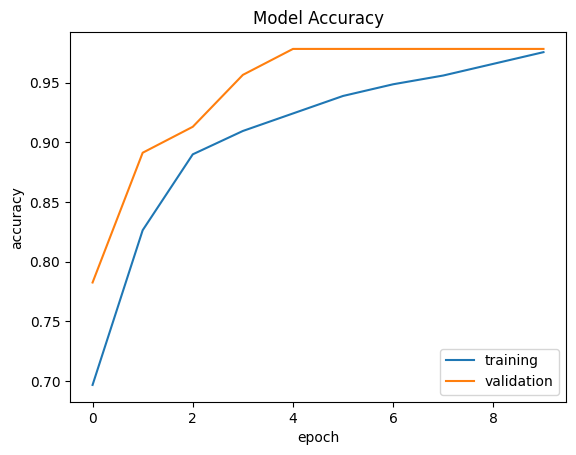

In [29]:
# visualize train validation accuracy

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training", "validation"], loc = "lower right")

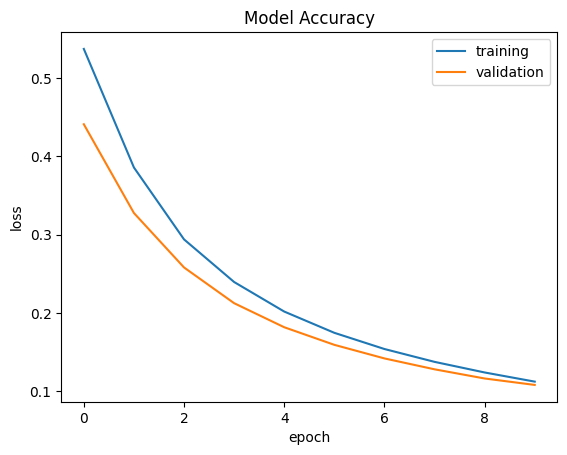

In [30]:
# visualize train validation loss

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training", "validation"], loc = "upper right")

Accuracy on test data

In [31]:
loss, accuracy = model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1093 - accuracy: 0.9649


In [32]:
print(accuracy)

0.9649122953414917


In [33]:
print(X_test.shape)

(114, 30)


In [34]:
print(X_test[0])

[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
  0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]


In [35]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [36]:
print(Y_pred.shape)

(114, 2)


In [37]:
print(Y_pred)

[[1.79875553e-01 7.44505167e-01]
 [2.37872362e-01 5.95354080e-01]
 [2.68955529e-02 8.19648981e-01]
 [9.99297082e-01 4.66313882e-04]
 [4.43731457e-01 5.10533571e-01]
 [9.86935198e-01 1.57208163e-02]
 [2.98805833e-01 6.28669739e-01]
 [2.56463103e-02 8.20828915e-01]
 [6.05501793e-02 7.39880204e-01]
 [5.41120246e-02 7.13978708e-01]
 [5.64017117e-01 2.57845879e-01]
 [9.49365348e-02 6.33486986e-01]
 [1.13835648e-01 7.01703429e-01]
 [1.33639872e-01 6.71635091e-01]
 [5.64712174e-02 7.47169375e-01]
 [7.32657015e-01 1.24206699e-01]
 [5.09415567e-02 7.64388561e-01]
 [7.69636855e-02 6.91576600e-01]
 [4.34606485e-02 6.47152305e-01]
 [9.62520361e-01 3.27725038e-02]
 [8.93798843e-02 5.87432802e-01]
 [1.07703753e-01 7.80166507e-01]
 [5.41633181e-02 7.58413792e-01]
 [3.36280838e-02 7.74756134e-01]
 [1.81901693e-01 6.45865679e-01]
 [9.47257459e-01 7.77333453e-02]
 [1.38221592e-01 7.70397961e-01]
 [2.46020615e-01 6.81383848e-01]
 [8.94561172e-01 1.03409842e-01]
 [9.42007542e-01 7.14475736e-02]
 [1.538406

In [38]:
# converting the prediction probability to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


Predictive System

taking data directly from dataset so we need to do some preprocessing

In [39]:
sample = data_frame.drop("label", axis = 1).iloc[0].values

In [40]:
input_data = (sample)
print(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1, -1)

# standardize the input data as model is trained as such
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]
1/1 [==============================] - 0s 34ms/step
[[0.9905227  0.00517691]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
predictin_label = [np.argmax(prediction)]
print(predictin_label)

if(predictin_label[0] == 0):
    print("The tumor is Malignant.")
else:
    print("The tumor is Benign.")

[0]
The tumor is Malignant.


data was standardised before split so we can use it directly after reshaping


In [42]:
input_data = X_test[0]
print(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1, -1)

print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
  0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]
[[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
   0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
   0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
  -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
   0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]]
1/1 [==============================] - 0s 22ms/step
[[0.17987555 0.74450517]]


In [43]:
predictin_label = [np.argmax(prediction)]
print(predictin_label)

if(predictin_label[0] == 0):
    print("The tumor is Malignant.")
else:
    print("The tumor is Benign.")

[1]
The tumor is Benign.
